In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Cross Talk between 36 and unshielded 32 (5GHz range)

In [2]:
CTdata=pd.read_csv('CrossTalk1.csv')

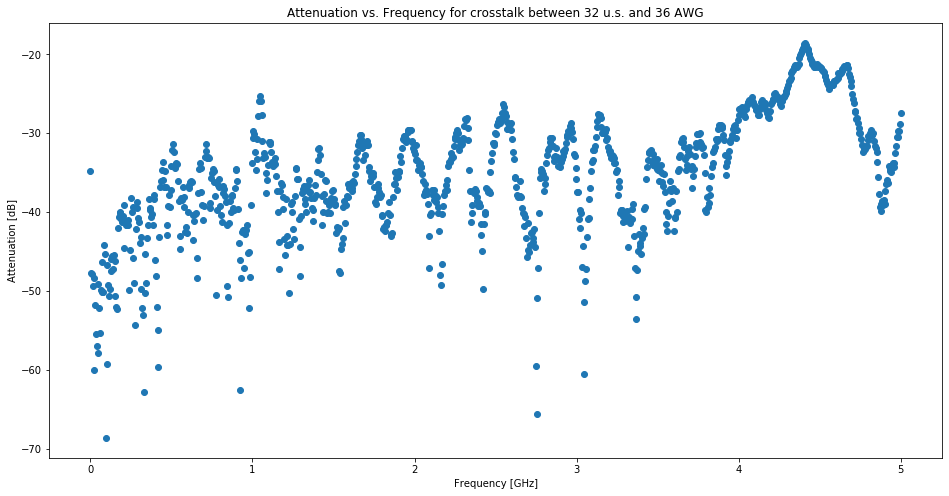

In [5]:
plt.figure(figsize=(16,8))
plt.scatter((10.**-9)*CTdata['Frequency'],CTdata['Attenuation'])
plt.xlabel('Frequency [GHz]')
plt.ylabel('Attenuation [dB]')
plt.title('Attenuation vs. Frequency for crosstalk between 32 u.s. and 36 AWG')
plt.show()

These measurements were taken using the spectrum analyzer. For the setup, the 32 AWG unshielded twisted pair was driven by the SA, and input was received from one leg of the 36 AWG twisted pair. The 32 AWG was driven differentially using a Balun transformer attached to the otuput of the SA. The 32 was then terminated using an external attachment with 50 ohms, a copper ground plane, and another 50 ohms back to the other end of the 32 AWG. The 36 AWG was twisted with the 32 AWG in parallel, terminated with a single 90 ohm resistor on the same end as the 32 had the multiple 50 ohm contraption. Finally, the 36 AWG had one leg terminated with a 50 ohm resistor on the close end of the cable, while the other close leg was fed into the input of the SA.

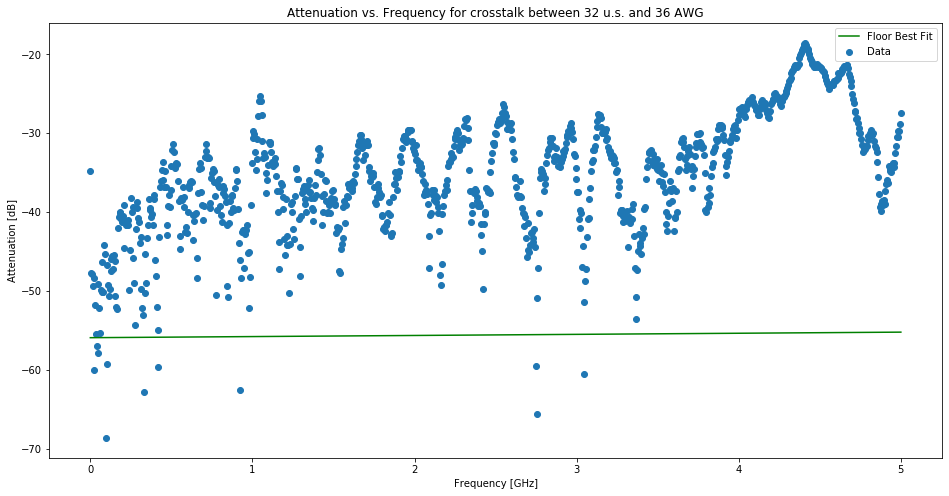

In [25]:
FreqArray=np.linspace(0,5,100)
plt.figure(figsize=(16,8))
plt.scatter((10.**-9)*CTdata['Frequency'],CTdata['Attenuation'], label='Data')
plt.plot(FreqArray,linfit(FreqArray,Fit[0],Fit[1]),color="green",label='Floor Best Fit',zorder=20)
plt.xlabel('Frequency [GHz]')
plt.ylabel('Attenuation [dB]')
plt.title('Attenuation vs. Frequency for crosstalk between 32 u.s. and 36 AWG')
plt.legend()
plt.show()

### Floor Measurement

In [7]:
Floordata=pd.read_csv('Floor1.csv')

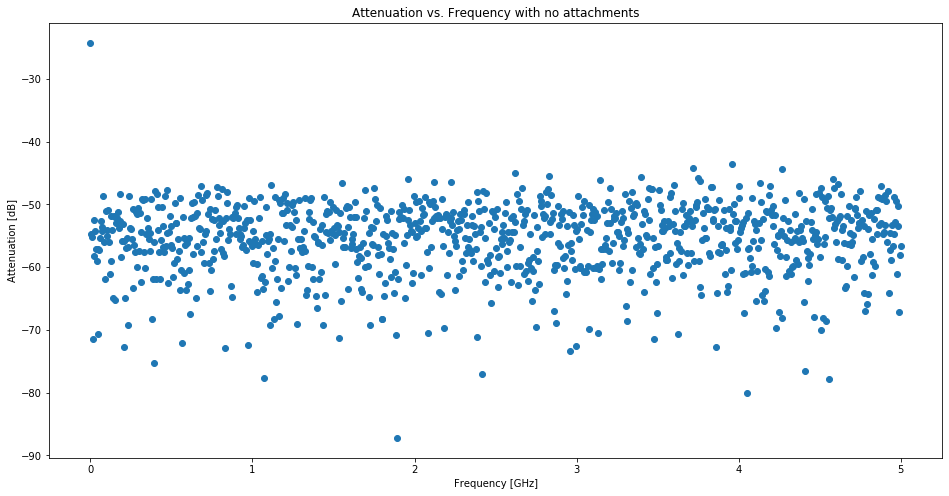

In [8]:
plt.figure(figsize=(16,8))
plt.scatter((10.**-9)*Floordata['Frequency'],Floordata['Attenuation'])
plt.xlabel('Frequency [GHz]')
plt.ylabel('Attenuation [dB]')
plt.title('Attenuation vs. Frequency with no attachments')
plt.show()

This data was taken with no input fed into the spectrum analyzer to get a baseline reading for the lowest possible attenuation values we can expect to measure using this system

In [9]:
Fit=np.polyfit((10.**-9)*Floordata['Frequency'],Floordata['Attenuation'],1)

In [10]:
def linfit(x,a,b):
    y=a*x+b
    return y

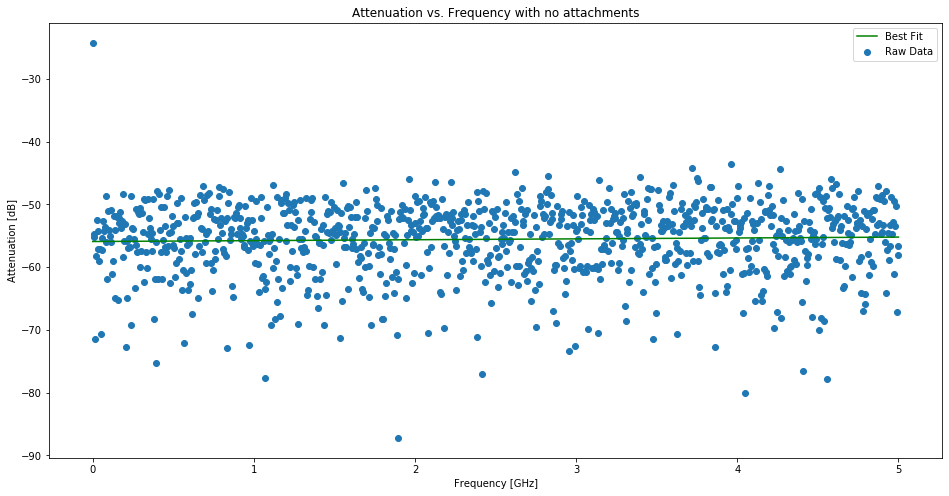

In [11]:
plt.figure(figsize=(16,8))
plt.plot(FreqArray,linfit(FreqArray,Fit[0],Fit[1]),color="green",label='Best Fit',zorder=20)
plt.scatter((10.**-9)*Floordata['Frequency'],Floordata['Attenuation'],label='Raw Data',zorder=1)
plt.xlabel('Frequency [GHz]')
plt.ylabel('Attenuation [dB]')
plt.title('Attenuation vs. Frequency with no attachments')
plt.legend()
plt.show()

In [12]:
print ('Average minimum attenuation resolution of', Fit[1] ,'dB')

Average minimum attenuation resolution of -55.91233080857556 dB


### Transformer Spectrum

In [13]:
TFdata=pd.read_csv('Transformer1.csv')

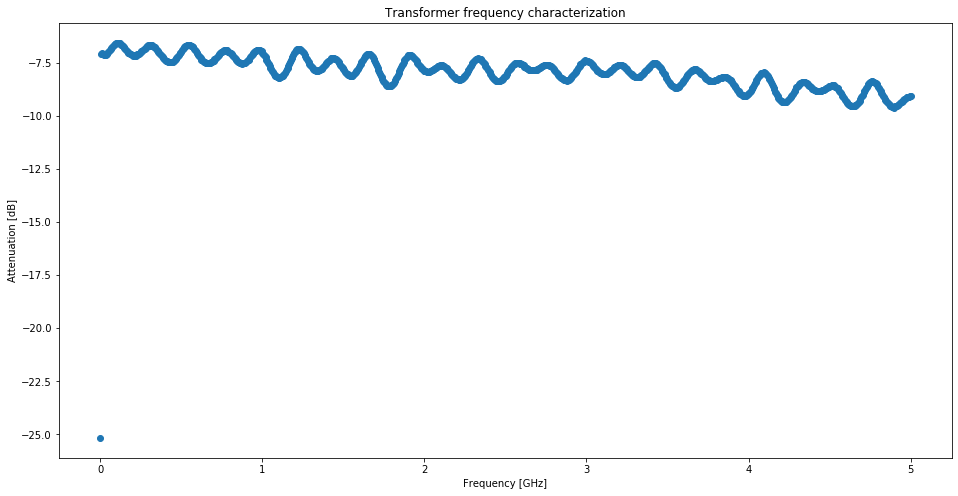

In [14]:
plt.figure(figsize=(16,8))
plt.scatter((10.**-9)*TFdata['Frequency'],TFdata['Attenuation'])
plt.xlabel('Frequency [GHz]')
plt.ylabel('Attenuation [dB]')
plt.title('Transformer frequency characterization')
plt.show()

This data was taken with one end of the Balun transformer output terminated with a 50 ohm resistar, and the other end fed into the input of the spectrum analyzer

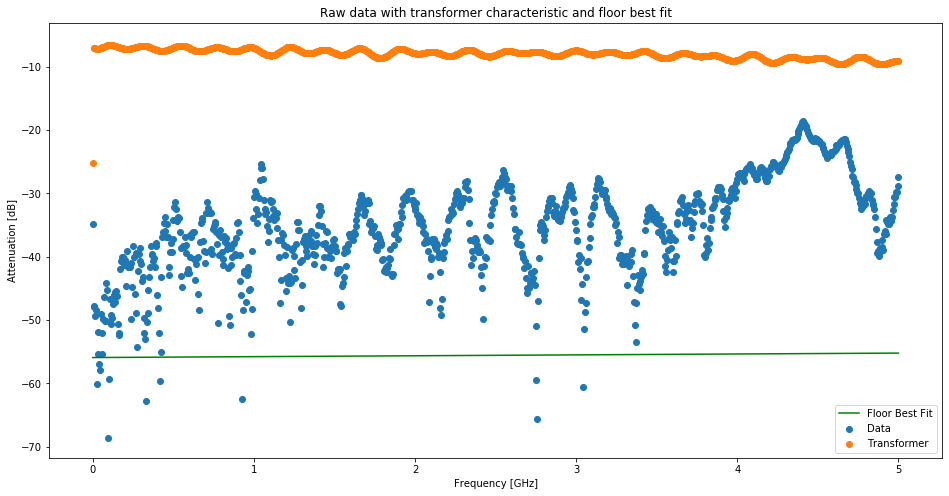

In [15]:
plt.figure(figsize=(16,8))
plt.scatter((10.**-9)*CTdata['Frequency'],CTdata['Attenuation'], label='Data')
plt.plot(FreqArray,linfit(FreqArray,Fit[0],Fit[1]),color="green",label='Floor Best Fit',zorder=20)
plt.scatter((10.**-9)*TFdata['Frequency'],TFdata['Attenuation'], label='Transformer')
plt.xlabel('Frequency [GHz]')
plt.ylabel('Attenuation [dB]')
plt.title('Raw data with transformer characteristic and floor best fit')
plt.legend()
plt.show()

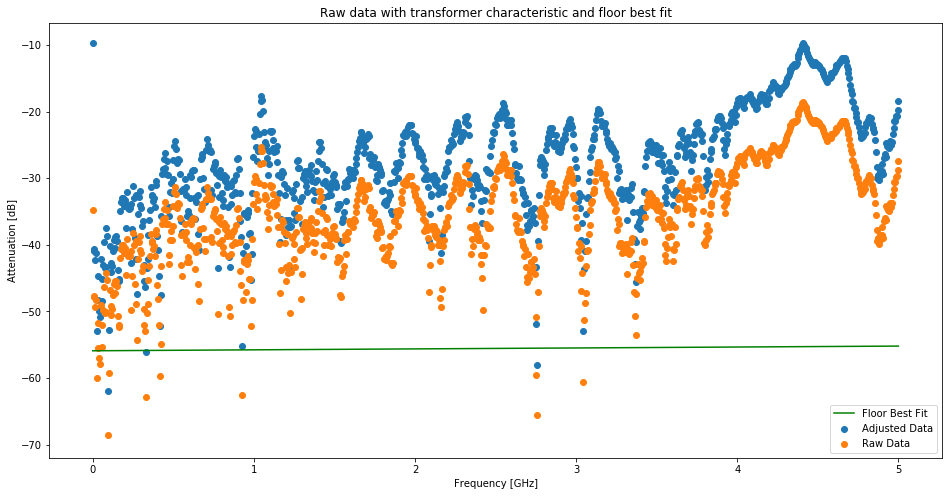

In [16]:
plt.figure(figsize=(16,8))
plt.scatter((10.**-9)*CTdata['Frequency'],CTdata['Attenuation']-TFdata['Attenuation'], label='Adjusted Data')
plt.plot(FreqArray,linfit(FreqArray,Fit[0],Fit[1]),color="green",label='Floor Best Fit',zorder=20)
plt.scatter((10.**-9)*CTdata['Frequency'],CTdata['Attenuation'], label='Raw Data')
plt.xlabel('Frequency [GHz]')
plt.ylabel('Attenuation [dB]')
plt.title('Raw data with transformer characteristic and floor best fit')
plt.legend()
plt.show()

This plot shows the data adjusted for intrinsic transformer frequency response. To do this, I subtracted the transformer data from the original raw data to better show the characteristics of the wire crosstalk alone

## Cross Talk between 36 and unshielded 32 (1MHz range)

In [17]:
CT2data=pd.read_csv('CrossTalk2.csv')
Floor2data=pd.read_csv('Floor2.csv')
TF2data=pd.read_csv('Transformer2.csv')

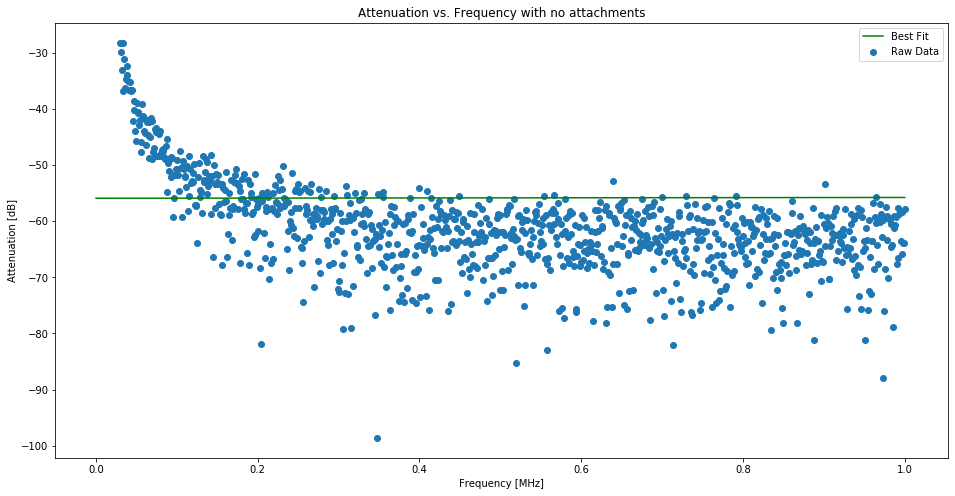

In [18]:
FreqArray2=np.linspace(0,1,100)
Fit2=np.polyfit((10.**-6)*Floor2data['Frequency'],Floor2data['Attenuation'],1)
plt.figure(figsize=(16,8))
plt.plot(FreqArray2,linfit(FreqArray2,Fit[0],Fit[1]),color="green",label='Best Fit',zorder=20)
plt.scatter((10.**-6)*Floor2data['Frequency'],Floor2data['Attenuation'],label='Raw Data',zorder=1)
plt.xlabel('Frequency [MHz]')
plt.ylabel('Attenuation [dB]')
plt.title('Attenuation vs. Frequency with no attachments')
plt.legend()
plt.show()

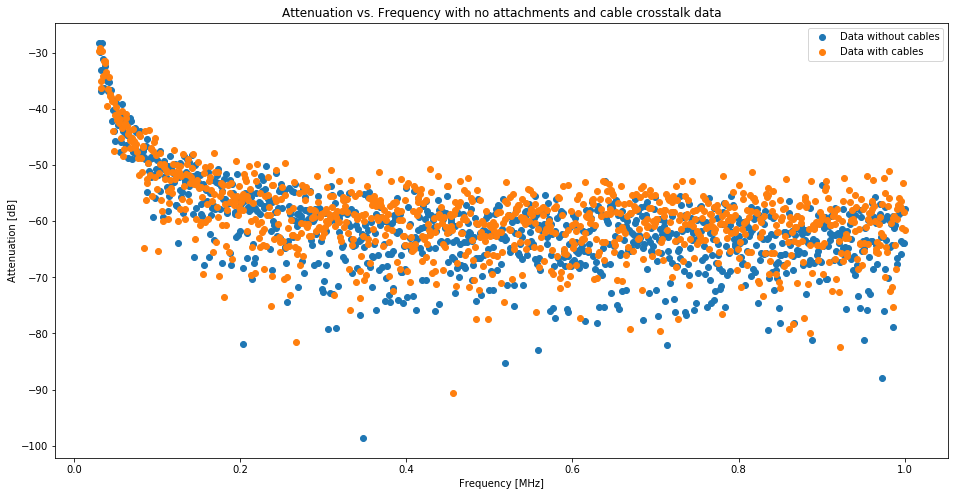

In [19]:
plt.figure(figsize=(16,8))
#plt.plot(FreqArray2,linfit(FreqArray2,Fit[0],Fit[1]),color="green",label='Best Fit',zorder=20)
plt.scatter((10.**-6)*Floor2data['Frequency'],Floor2data['Attenuation'],label='Data without cables',zorder=1)
plt.scatter((10.**-6)*CT2data['Frequency'],CT2data['Attenuation'], label='Data with cables')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Attenuation [dB]')
plt.title('Attenuation vs. Frequency with no attachments and cable crosstalk data')
plt.legend()
plt.show()

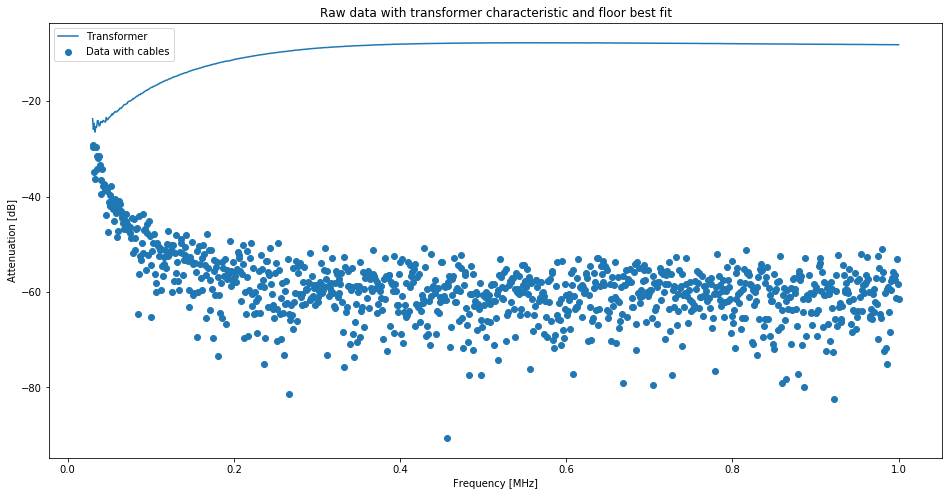

In [20]:
plt.figure(figsize=(16,8))
plt.scatter((10.**-6)*CT2data['Frequency'],CT2data['Attenuation'], label='Data with cables')
#plt.plot(FreqArray2,linfit(FreqArray2,Fit[0],Fit[1]),color="green",label='Floor Best Fit',zorder=20)
plt.plot((10.**-6)*TF2data['Frequency'],TF2data['Attenuation'], label='Transformer')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Attenuation [dB]')
plt.title('Raw data with transformer characteristic and floor best fit')
plt.legend()
plt.show()

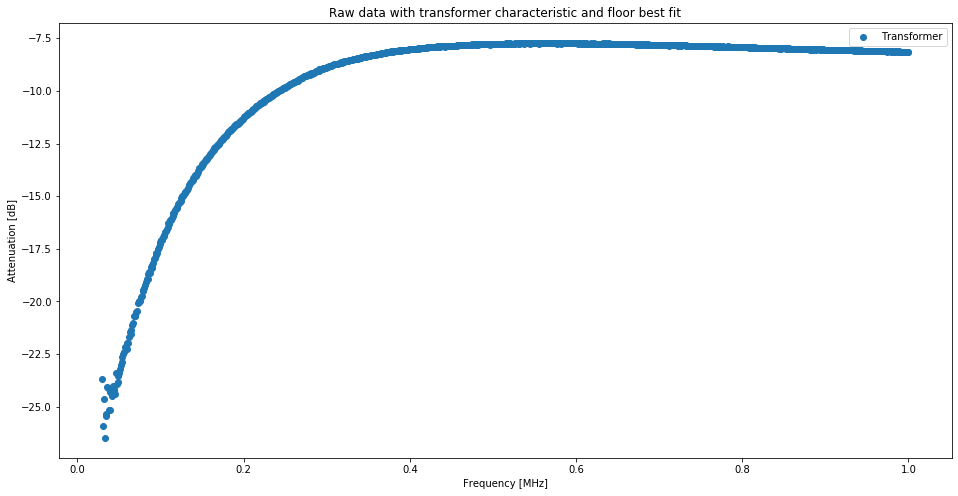

In [21]:
plt.figure(figsize=(16,8))
plt.scatter((10.**-6)*TF2data['Frequency'],TF2data['Attenuation'], label='Transformer')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Attenuation [dB]')
plt.title('Raw data with transformer characteristic and floor best fit')
plt.legend()
plt.show()

## New Data in high power mode

In [22]:
CT3data=pd.read_csv('CrossTalk3.csv')    #GHz range
CT4data=pd.read_csv('CrossTalk4.csv')    #MHz range

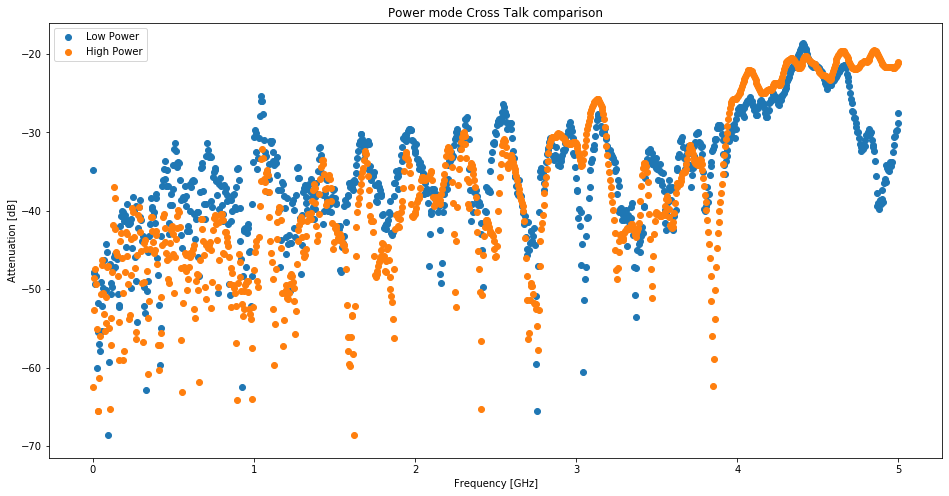

In [23]:
plt.figure(figsize=(16,8))
plt.scatter((10.**-9)*CTdata['Frequency'],CTdata['Attenuation'], label='Low Power')
plt.scatter((10.**-9)*CT3data['Frequency'],CT3data['Attenuation'], label='High Power')
plt.xlabel('Frequency [GHz]')
plt.ylabel('Attenuation [dB]')
plt.title('Power mode Cross Talk comparison')
plt.legend()
plt.show()

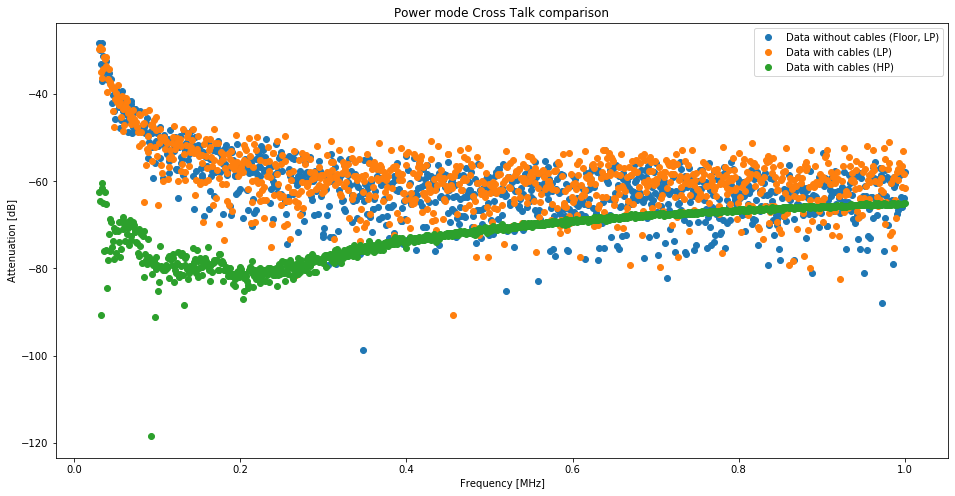

In [24]:
plt.figure(figsize=(16,8))
plt.scatter((10.**-6)*Floor2data['Frequency'],Floor2data['Attenuation'],label='Data without cables (Floor, LP)',zorder=1)
plt.scatter((10.**-6)*CT2data['Frequency'],CT2data['Attenuation'], label='Data with cables (LP)')
plt.scatter((10.**-6)*CT4data['Frequency'],CT4data['Attenuation'], label='Data with cables (HP)')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Attenuation [dB]')
plt.title('Power mode Cross Talk comparison')
plt.legend()
plt.show()

Both measurements above were cross talk measurements retaken with the spectrum analyzer set to high power mode, giving it higher accuracy of measurements. These new data sets are then compared with their low power counterparts in each frequency range